# 01. Problem Statement:  

### ***IDENTIFY THE FEATURES THAT AFFACT THE SLEEP EFFICIENCY OF HUMANS***

### ***UNDESTAND HOW SLEEP EFFICIENCY VARIES BETWEEN AGES***



In [1]:
#### Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 2.***GET THE DATA(KAGGLE)***


In [2]:

sleep = pd.read_csv('Sleep_Efficiency.csv')

In [3]:
sleep.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [4]:
sleep.shape

(452, 15)

In [5]:
# Information on dataframe
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [6]:
sleep.describe()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,446.000000
mean,226.500000,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,1.791480
std,130.625419,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,1.428134
min,1.000000,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,113.750000,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,226.500000,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,339.250000,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000
max,452.000000,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


## 3. ***Exploratory Data Analysis***

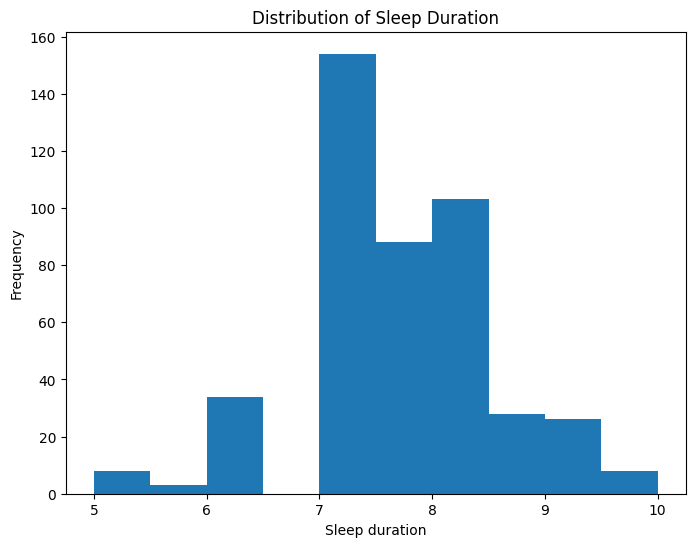

In [7]:
# Creating a histogram of Distribution of Sleep Duration
plt.figure(figsize=(8,6))
plt.hist(sleep["Sleep duration"])
plt.xlabel("Sleep duration")
plt.ylabel("Frequency")
plt.title("Distribution of Sleep Duration");

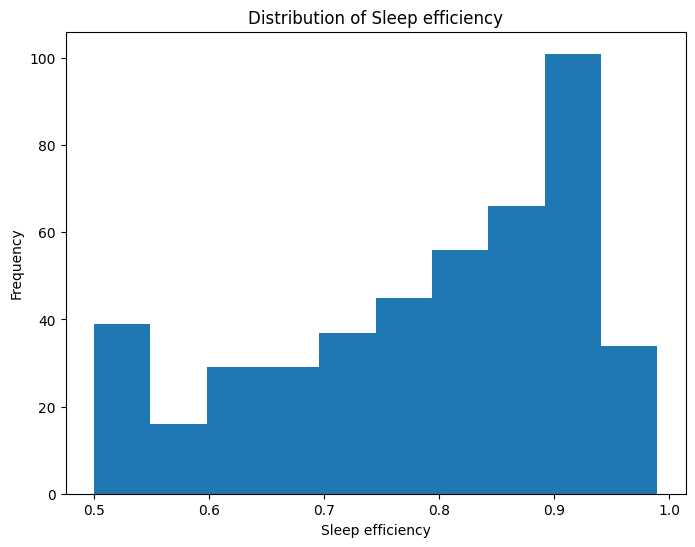

In [8]:
# Creating a histogram of Distribution of Sleep efficiency
plt.figure(figsize=(8,6))
plt.hist(sleep["Sleep efficiency"])
plt.xlabel("Sleep efficiency")
plt.ylabel("Frequency")
plt.title("Distribution of Sleep efficiency");

In [9]:
sleep['REM sleep percentage'] = sleep['REM sleep percentage']/100
sleep['Deep sleep percentage'] = sleep['Deep sleep percentage']/100
sleep['Light sleep percentage'] = sleep['Light sleep percentage']/100

In [10]:
gender_group = sleep.groupby(['Gender'])[['Sleep efficiency', 'REM sleep percentage',
                                       'Deep sleep percentage', 'Light sleep percentage', 'Sleep duration']].mean() 
gender_group

,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Sleep duration
Gender,,,,,
Female,0.787545,0.231875,0.51625,0.251875,7.504464
Male,0.790263,0.220526,0.54000,0.239474,7.427632


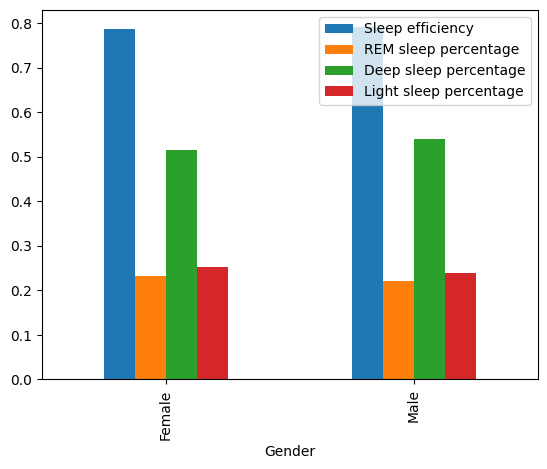

In [11]:
gender_group.drop(columns=['Sleep duration']).plot(kind="bar");

### From the plot above plot, it is clear that the gender of a person has very little impact on the Sleep efficiency and general sleep percentage

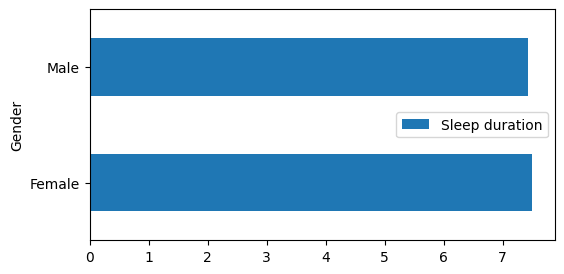

In [12]:
gender_group[['Sleep duration']].plot(kind='barh', figsize=(6,3));

In [13]:
# Sleep duration is also about the same in both males and females.

### Performing Age binning to check distribution of Sleep efficiency among different age groups.

In [14]:
min(sleep['Age']), max(sleep['Age'])

(9, 69)

In [15]:
age_bins = [9, 12, 19, 29, 39, 49, 59, 70]
group_names = ["Child", "Teen", "20+", "30+", "40+", "50+", "60+"]

In [16]:
sleep["age-binned"] = pd.cut(sleep["Age"], age_bins, labels=group_names, include_lowest = True)
sleep[['Age', 'age-binned']].head()

,Age,age-binned
0,65,60+
1,69,60+
2,40,40+
3,40,40+
4,57,50+


In [17]:
age_groups = sleep.groupby(['age-binned'])[['Sleep efficiency', 'Sleep duration']].mean()
age_groups

,Sleep efficiency,Sleep duration
age-binned,,
Child,0.542500,8.375000
Teen,0.719231,7.807692
20+,0.766509,7.415094
30+,0.813474,7.568421
40+,0.807347,7.367347
50+,0.801569,7.392157
60+,0.754706,7.602941


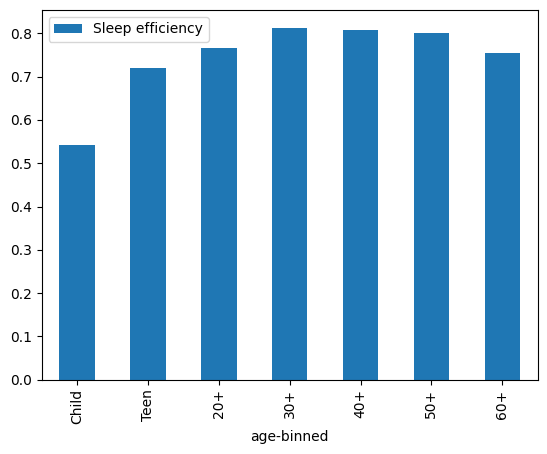

In [18]:
age_groups.plot(kind='bar', y='Sleep efficiency');

### While Sleep efficiency describes the percentage of sleep time actually spent sleeping, the dataset shows that Sleep efficiency increases to over 80% in age bracket of 40+ from around 50% in children before gradually decreasing as age increases further.

### Sleep duration among age groups

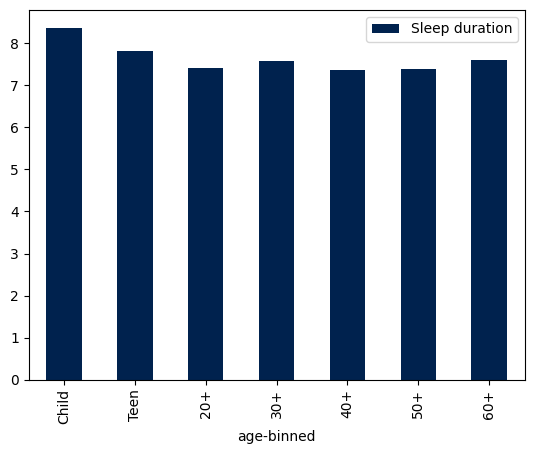

In [19]:
age_groups.plot(kind='bar', y='Sleep duration', colormap='cividis');

### Sleep efficiency among smokers

In [20]:
smoking_group = sleep.groupby(['Smoking status'])[['Sleep efficiency']].mean()
smoking_group

,Sleep efficiency
Smoking status,
No,0.817081
Yes,0.734416


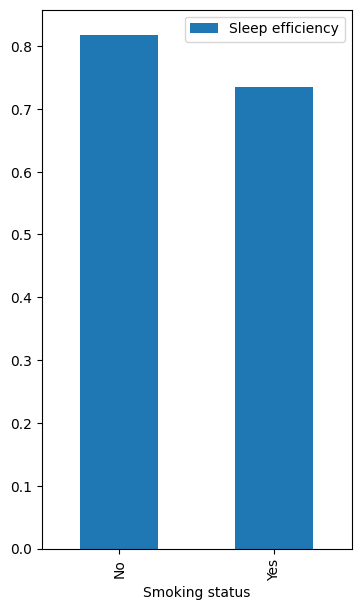

In [21]:
smoking_group.plot(kind='bar', figsize=(4,7));

In [22]:
## It is clear here that Smokers generally have a lower sleep efficiency compared to non-smokers. 

### Effect of Exercise on Sleep efficiency

In [23]:
sleep['Exercise frequency'].value_counts()

Exercise frequency
3.0    130
0.0    116
1.0     97
2.0     54
4.0     41
5.0      8
Name: count, dtype: int64

In [24]:
exercise_group = sleep.groupby(['Exercise frequency'])[['Exercise frequency', 'Sleep efficiency']].mean()
exercise_group = exercise_group.drop(columns=['Exercise frequency']).reset_index()
exercise_group

,Exercise frequency,Sleep efficiency
0,0.0,0.743879
1,1.0,0.774124
2,2.0,0.810000
3,3.0,0.799154
4,4.0,0.881463
5,5.0,0.851250


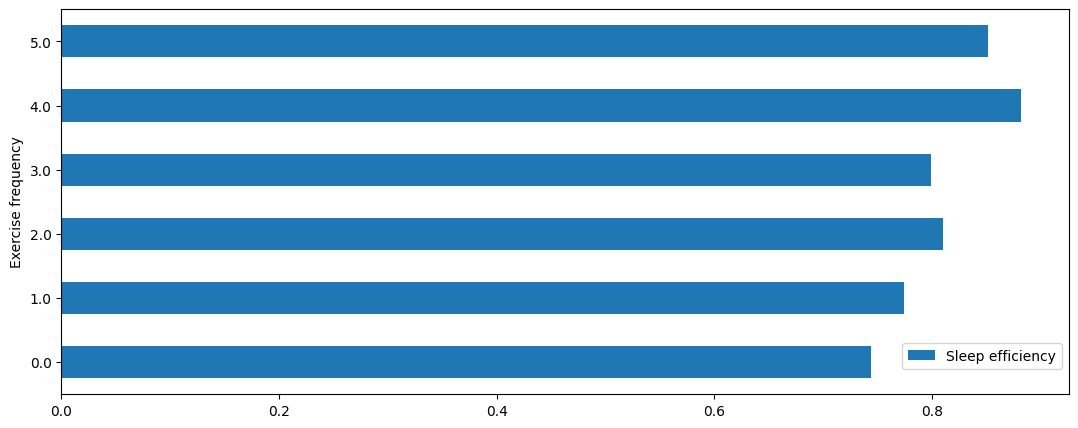

In [25]:


exercise_group.plot(
    kind='barh', x='Exercise frequency', y='Sleep efficiency', figsize=(13,5)
).legend(bbox_to_anchor=(1, 0.15));



### Sleep efficiency is generally higher amongst people with a frequent level of exercising.

## 4. ***Cleaning dataset***

In [26]:
sleep_clean = sleep.drop(columns=['ID', 'Bedtime', 'Wakeup time'])

In [27]:
sleep_clean.dtypes

Age                          int64
Gender                      object
Sleep duration             float64
Sleep efficiency           float64
REM sleep percentage       float64
Deep sleep percentage      float64
Light sleep percentage     float64
Awakenings                 float64
Caffeine consumption       float64
Alcohol consumption        float64
Smoking status              object
Exercise frequency         float64
age-binned                category
dtype: object

In [28]:
sleep_clean['Gender']=sleep_clean['Gender'].astype('category')
sleep_clean['Smoking status']=sleep_clean['Smoking status'].astype('category')

In [29]:
sleep_clean.dtypes

Age                          int64
Gender                    category
Sleep duration             float64
Sleep efficiency           float64
REM sleep percentage       float64
Deep sleep percentage      float64
Light sleep percentage     float64
Awakenings                 float64
Caffeine consumption       float64
Alcohol consumption        float64
Smoking status            category
Exercise frequency         float64
age-binned                category
dtype: object

In [30]:
sleep_clean = pd.get_dummies(sleep_clean, columns = ['Gender', 'Smoking status', 'age-binned'])
sleep_clean.head()

,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,...,Gender_Male,Smoking status_No,Smoking status_Yes,age-binned_Child,age-binned_Teen,age-binned_20+,age-binned_30+,age-binned_40+,age-binned_50+,age-binned_60+
0,65,6.0,0.88,0.18,0.70,0.12,0.0,0.0,0.0,3.0,...,False,False,True,False,False,False,False,False,False,True
1,69,7.0,0.66,0.19,0.28,0.53,3.0,0.0,3.0,3.0,...,True,False,True,False,False,False,False,False,False,True
2,40,8.0,0.89,0.20,0.70,0.10,1.0,0.0,0.0,3.0,...,False,True,False,False,False,False,False,True,False,False
3,40,6.0,0.51,0.23,0.25,0.52,3.0,50.0,5.0,1.0,...,False,False,True,False,False,False,False,True,False,False
4,57,8.0,0.76,0.27,0.55,0.18,3.0,0.0,3.0,3.0,...,True,True,False,False,False,False,False,False,True,False


In [31]:
#To check for missing data 
sleep_clean.isna().sum()

Age                        0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Exercise frequency         6
Gender_Female              0
Gender_Male                0
Smoking status_No          0
Smoking status_Yes         0
age-binned_Child           0
age-binned_Teen            0
age-binned_20+             0
age-binned_30+             0
age-binned_40+             0
age-binned_50+             0
age-binned_60+             0
dtype: int64

There are missing data for `Awakenings`, `Caffeine_consumption`, `Alcohol_consumption` and `Exercise_frequency`.

### Since all of these features are either ordinal or descrete, we can assume that the missing datas should have values as zero.

In [32]:
# Replace NaNs with zeros in all columns
sleep_clean.fillna(0, inplace=True)
sleep_clean.isna().sum()

Age                       0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Exercise frequency        0
Gender_Female             0
Gender_Male               0
Smoking status_No         0
Smoking status_Yes        0
age-binned_Child          0
age-binned_Teen           0
age-binned_20+            0
age-binned_30+            0
age-binned_40+            0
age-binned_50+            0
age-binned_60+            0
dtype: int64

### Correlation Heatmap plot

In [ ]:

# df_clean_without_age_bin = df_clean[df_clean.columns[~df_clean.columns.isin(['age-binned'])]]

# print(df_clean_without_age_bin)

sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(sleep_clean.corr(), annot=True);

### From the correlation plot, it is observed that Deep sleep percentage has a strong positive correlation with our target feature, Sleep efficiency.

### Also, Light sleep percentage is strongly negatively correlated with Sleep efficiency and in summary says that Sleep efficiency decreases with increase in Light sleep percentage and increases with an increase as well in Deep sleep percentage.

## Checking and Dealing with outliers

Box Plots of the continuous features


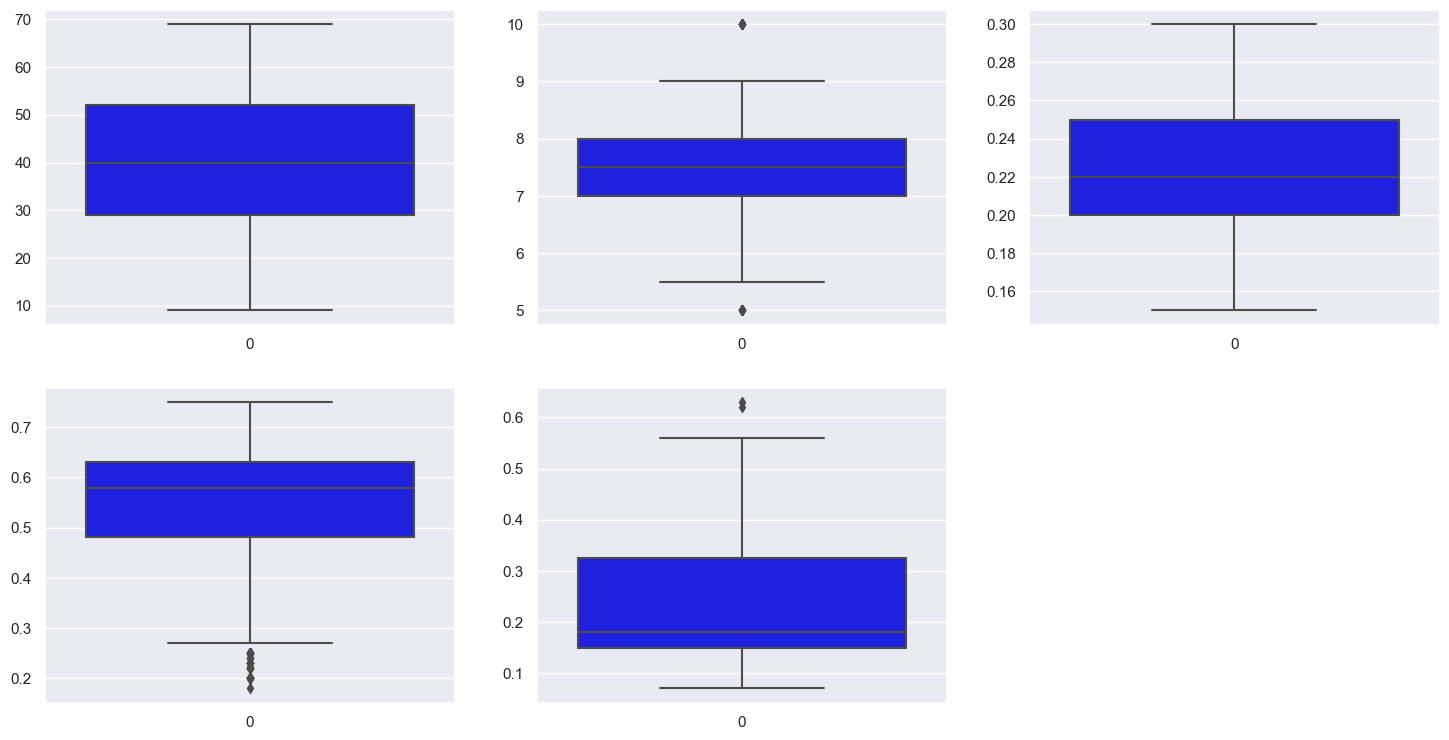

In [34]:
# Next step in our process flow is to check for any outliers present in the continuous attributes/features.
# We can identify with visuals and let us use z score technique.

column_names_=['Age','Sleep duration','REM sleep percentage','Deep sleep percentage','Light sleep percentage']
plt.figure(figsize=(18,9))
for i in range(0,len(column_names_)):
    plt.subplot(2,3,i+1)
    sns.boxplot(sleep_clean[column_names_[i]],color='blue')
print('Box Plots of the continuous features')
plt.show()

In [90]:
###there are a little bit outlier so i exceptthe outlier

## Split the Data

In [36]:
sleep_clean.head()

,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,...,Gender_Male,Smoking status_No,Smoking status_Yes,age-binned_Child,age-binned_Teen,age-binned_20+,age-binned_30+,age-binned_40+,age-binned_50+,age-binned_60+
0,65,6.0,0.88,0.18,0.70,0.12,0.0,0.0,0.0,3.0,...,False,False,True,False,False,False,False,False,False,True
1,69,7.0,0.66,0.19,0.28,0.53,3.0,0.0,3.0,3.0,...,True,False,True,False,False,False,False,False,False,True
2,40,8.0,0.89,0.20,0.70,0.10,1.0,0.0,0.0,3.0,...,False,True,False,False,False,False,False,True,False,False
3,40,6.0,0.51,0.23,0.25,0.52,3.0,50.0,5.0,1.0,...,False,False,True,False,False,False,False,True,False,False
4,57,8.0,0.76,0.27,0.55,0.18,3.0,0.0,3.0,3.0,...,True,True,False,False,False,False,False,False,True,False


In [37]:
sleep_clean.columns[0:14]

Index(['Age', 'Sleep duration', 'Sleep efficiency', 'REM sleep percentage',
       'Deep sleep percentage', 'Light sleep percentage', 'Awakenings',
       'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency',
       'Gender_Female', 'Gender_Male', 'Smoking status_No',
       'Smoking status_Yes'],
      dtype='object')

In [38]:
X1 = sleep_clean.drop(columns=['Age', 'Sleep efficiency'])
X2 = sleep_clean[sleep_clean.columns[0:14]].drop(columns=['Sleep efficiency'])

In [39]:
y = sleep_clean['Sleep efficiency']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=42)

### In the test split the test_size parameter is set to 0.3, which splits the data into 70% training data and 30% test data.

In [42]:
print("X1_train shape: {}".format(X1_train.shape))
print("X1_test shape: {}".format(X1_test.shape))
print()
print("X2_train shape: {}".format(X2_train.shape))
print("X2_test shape: {}".format(X2_test.shape))
print()
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X1_train shape: (316, 19)
X1_test shape: (136, 19)

X2_train shape: (316, 13)
X2_test shape: (136, 13)

y_train shape: (316,)
y_test shape: (136,)


## 5. ***Model training and exploration***

In [43]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from xgboost import XGBRegressor

In [44]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [45]:
models = {'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42),
          'RandomForestRegressor': RandomForestRegressor(random_state=42),
         'LinearRegression': LinearRegression(), 'ElasticNet': ElasticNet(alpha=0.001, random_state=42),
          'Lasso': Lasso(alpha=0.001, random_state=42), 'Ridge': Ridge(alpha=0.001, random_state=42),
         'XGBRegressor': XGBRegressor(eval_metric=r2_score)}

In [46]:
def train(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model

In [47]:
def score(model, X_test, y_test):
    predictions = model.predict(X_test)
    
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rss = np.sum(np.square(y_test-predictions))
    
    print('RMSE:', rmse)
    print('R-Squared:', r2)
    print('MSE:', mse)
    print('RSS', rss)
    print('MAE:', mae)
    print()
    return [r2, mae, mse, rmse, rss]

In [48]:
scoring1 = pd.DataFrame()
scoring1['Metric'] = ['R2_score', 'MAE', 'MSE', 'RMSE', 'RSS']

In [49]:
# print(X1_train)

# Using the first training set X1_train
for name, func in models.items():
    print(f'Performance of {name} on Test:')
    print('=='*24)
    print ('Test set:')
    print("**"*8)
    

    
    model = train(func, X1_train, y_train)
    results = score(model, X1_test, y_test)
    scoring1[name] = results

Performance of GradientBoostingRegressor on Test:
Test set:
****************
RMSE: 0.05192678103079729
R-Squared: 0.8673757687421979
MSE: 0.002696390588220369
RSS 0.3667091199979702
MAE: 0.04027384491643699

Performance of RandomForestRegressor on Test:
Test set:
****************
RMSE: 0.05294012477234988
R-Squared: 0.8621489755043361
MSE: 0.002802656810911973
RSS 0.3811613262840283
MAE: 0.04035251838235291

Performance of LinearRegression on Test:
Test set:
****************
RMSE: 0.06177878808757686
R-Squared: 0.8122764121504931
MSE: 0.0038166186575697278
RSS 0.519060137429483
MAE: 0.04970224883851021

Performance of ElasticNet on Test:
Test set:
****************
RMSE: 0.06296150283553853
R-Squared: 0.8050199181267763
MSE: 0.003964150839309527
RSS 0.5391245141460956
MAE: 0.05115476433671451

Performance of Lasso on Test:
Test set:
****************
RMSE: 0.06284050331398086
R-Squared: 0.8057686240981619
MSE: 0.003948928856754439
RSS 0.5370543245186037
MAE: 0.05076112638406618

Performa

In [50]:
scoring1

,Metric,GradientBoostingRegressor,RandomForestRegressor,LinearRegression,ElasticNet,Lasso,Ridge,XGBRegressor
0,R2_score,0.867376,0.862149,0.812276,0.805020,0.805769,0.812258,0.829626
1,MAE,0.040274,0.040353,0.049702,0.051155,0.050761,0.049708,0.044434
2,MSE,0.002696,0.002803,0.003817,0.003964,0.003949,0.003817,0.003464
3,RMSE,0.051927,0.052940,0.061779,0.062962,0.062841,0.061782,0.058855
4,RSS,0.366709,0.381161,0.519060,0.539125,0.537054,0.519111,0.471087


### The first training set makes use of the binned ages as categories rather than age as continuous data.

In [51]:
scoring2 = pd.DataFrame()
scoring2['Metric'] = ['R2_score', 'MAE', 'MSE', 'RMSE', 'RSS']

In [52]:
# Using the second training set X2_train
for name, func in models.items():
    print(f'Performance of {name} on Test:')
    print('=='*24)
    print ('Test set:')
    print("**"*8)
    
    model = train(func, X2_train, y_train)
    results = score(model, X2_test, y_test)
    scoring2[name] = results

Performance of GradientBoostingRegressor on Test:
Test set:
****************
RMSE: 0.04960931969884767
R-Squared: 0.8789494909633471
MSE: 0.002461084600982476
RSS 0.33470750573361674
MAE: 0.03851718350795349

Performance of RandomForestRegressor on Test:
Test set:
****************
RMSE: 0.05110560361240482
R-Squared: 0.8715372776319312
MSE: 0.0026117827205882444
RSS 0.3552024500000012
MAE: 0.03886102941176475

Performance of LinearRegression on Test:
Test set:
****************
RMSE: 0.061630728862976054
R-Squared: 0.8131751317231632
MSE: 0.00379834674018167
RSS 0.5165751566647071
MAE: 0.05010163855309618

Performance of ElasticNet on Test:
Test set:
****************
RMSE: 0.06275598050258868
R-Squared: 0.8062907695413492
MSE: 0.003938313088841291
RSS 0.5356105800824156
MAE: 0.05173830804806547

Performance of Lasso on Test:
Test set:
****************
RMSE: 0.062321580631405624
R-Squared: 0.8089632169610006
MSE: 0.003883979412396792
RSS 0.5282212000859637
MAE: 0.05132908753994786

Perfo

In [53]:
scoring2

,Metric,GradientBoostingRegressor,RandomForestRegressor,LinearRegression,ElasticNet,Lasso,Ridge,XGBRegressor
0,R2_score,0.878949,0.871537,0.813175,0.806291,0.808963,0.813156,0.841637
1,MAE,0.038517,0.038861,0.050102,0.051738,0.051329,0.050106,0.042384
2,MSE,0.002461,0.002612,0.003798,0.003938,0.003884,0.003799,0.003220
3,RMSE,0.049609,0.051106,0.061631,0.062756,0.062322,0.061634,0.056742
4,RSS,0.334708,0.355202,0.516575,0.535611,0.528221,0.516627,0.437879


### The second training set makes use of the ages as continuous data.

### Scaling training data

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
scaler = MinMaxScaler()

In [56]:
# Fit and transform the training data
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.fit_transform(X1_test)

X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.fit_transform(X2_test)

In [57]:
X1_train_scaled

array([[0.4       , 0.33333333, 0.90909091, ..., 0.        , 1.        ,
        0.        ],
       [0.6       , 0.46666667, 0.78181818, ..., 0.        , 0.        ,
        0.        ],
       [0.6       , 0.8       , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.4       , 0.46666667, 0.81818182, ..., 0.        , 1.        ,
        0.        ],
       [0.4       , 0.86666667, 0.67272727, ..., 1.        , 0.        ,
        0.        ],
       [0.6       , 0.53333333, 0.72727273, ..., 0.        , 1.        ,
        0.        ]])

In [58]:
scoring3 = pd.DataFrame()
scoring3['Metric'] = ['R2_score', 'MAE', 'MSE', 'RMSE', 'RSS']

In [59]:
# Using the third training set X1_train_scaled
for name, func in models.items():
    print(f'Performance of {name} on Test:')
    print('=='*24)
    print ('Test set:')
    print("**"*8)
    
    model = train(func, X1_train_scaled, y_train)
    results = score(model, X1_test_scaled, y_test)
    scoring3[name] = results

Performance of GradientBoostingRegressor on Test:
Test set:
****************
RMSE: 0.05105728653880407
R-Squared: 0.8717800693510274
MSE: 0.0026068465087055433
RSS 0.3545311251839539
MAE: 0.0385604992670219

Performance of RandomForestRegressor on Test:
Test set:
****************
RMSE: 0.052052890269773645
R-Squared: 0.8667308048196469
MSE: 0.002709503385437096
RSS 0.36849246041944506
MAE: 0.039672365196078446

Performance of LinearRegression on Test:
Test set:
****************
RMSE: 0.05998465670787572
R-Squared: 0.8230215315407112
MSE: 0.0035981590403616997
RSS 0.48934962948919114
MAE: 0.04728284808497739

Performance of ElasticNet on Test:
Test set:
****************
RMSE: 0.06034887111274164
R-Squared: 0.8208658537641572
MSE: 0.0036419862445823026
RSS 0.4953101292631932
MAE: 0.047919701668878656

Performance of Lasso on Test:
Test set:
****************
RMSE: 0.06085796524723712
R-Squared: 0.8178308077053609
MSE: 0.0037036919340339212
RSS 0.5037021030286133
MAE: 0.048314564169927354


In [60]:
scoring3

,Metric,GradientBoostingRegressor,RandomForestRegressor,LinearRegression,ElasticNet,Lasso,Ridge,XGBRegressor
0,R2_score,0.871780,0.866731,0.823022,0.820866,0.817831,0.823023,0.842368
1,MAE,0.038560,0.039672,0.047283,0.047920,0.048315,0.047283,0.042243
2,MSE,0.002607,0.002710,0.003598,0.003642,0.003704,0.003598,0.003205
3,RMSE,0.051057,0.052053,0.059985,0.060349,0.060858,0.059984,0.056611
4,RSS,0.354531,0.368492,0.489350,0.495310,0.503702,0.489346,0.435857


In [61]:
scoring4 = pd.DataFrame()
scoring4['Metric'] = ['R2_score', 'MAE', 'MSE', 'RMSE', 'RSS']

In [62]:
# Using the fourth training set X2_train_scaled
for name, func in models.items():
    print(f'Performance of {name} on Test:')
    print('=='*24)
    print ('Test set:')
    print("**"*8)
    
    model = train(func, X2_train_scaled, y_train)
    results = score(model, X2_test_scaled, y_test)
    scoring4[name] = results

Performance of GradientBoostingRegressor on Test:
Test set:
****************
RMSE: 0.0485096673089038
R-Squared: 0.8842564844584608
MSE: 0.0023531878224205298
RSS 0.320033543849192
MAE: 0.03665249897752667

Performance of RandomForestRegressor on Test:
Test set:
****************
RMSE: 0.05025346490834364
R-Squared: 0.8757855561275935
MSE: 0.0025254107352941256
RSS 0.34345586000000106
MAE: 0.03803823529411771

Performance of LinearRegression on Test:
Test set:
****************
RMSE: 0.05998733909704735
R-Squared: 0.8230057029682789
MSE: 0.0035984808519441453
RSS 0.4893933958644038
MAE: 0.047603163604738624

Performance of ElasticNet on Test:
Test set:
****************
RMSE: 0.06011535969005759
R-Squared: 0.8222494402732987
MSE: 0.0036138564706650004
RSS 0.49148448001044004
MAE: 0.04820834596154028

Performance of Lasso on Test:
Test set:
****************
RMSE: 0.06021830792726798
R-Squared: 0.8216401192746154
MSE: 0.0036262446096232658
RSS 0.4931692669087641
MAE: 0.0484034275974973

Per

In [63]:
scoring4

,Metric,GradientBoostingRegressor,RandomForestRegressor,LinearRegression,ElasticNet,Lasso,Ridge,XGBRegressor
0,R2_score,0.884256,0.875786,0.823006,0.822249,0.821640,0.823007,0.852719
1,MAE,0.036652,0.038038,0.047603,0.048208,0.048403,0.047603,0.040295
2,MSE,0.002353,0.002525,0.003598,0.003614,0.003626,0.003598,0.002994
3,RMSE,0.048510,0.050253,0.059987,0.060115,0.060218,0.059987,0.054721
4,RSS,0.320034,0.343456,0.489393,0.491484,0.493169,0.489390,0.407235


### We select RandomForestRegressor and the scaled dataset of using the ages as continuous data as our best set for the best model scores.

## Final Model Training

### Hyperparameter tuning

In [64]:
# Using Grid Search for hyper parameter tuning
from sklearn.model_selection import GridSearchCV 

In [65]:
rf_model = RandomForestRegressor(random_state=42)

In [66]:
# Getting parameters of model that can be tuned
rf_model.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [67]:
# We need to find the best parameters of the RF in order to obtain the best possible performance.

param_grid = {
    'max_depth' : [3,5,7,9,10],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse'],
    'n_estimators': [1,2,4,8,10,16,32,64,100,200],
    'min_samples_split': [1,2,5,8,10,11,15,20,25,50,55,60,80,100],
}

In [69]:
####********************************
####********************************
####********************************

####    It will take couple of minutes to compute the result

####********************************
####********************************
####********************************


grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='r2',cv=5,n_jobs=3)
grid_search.fit(X2_train_scaled,y_train)

print(grid_search.best_score_)
print(grid_search.best_params_)

0.8369003499827905
{'criterion': 'friedman_mse', 'max_depth': 9, 'min_samples_split': 11, 'n_estimators': 8}


In [70]:
rf_model_search = RandomForestRegressor(criterion = 'friedman_mse', max_depth = 9,
                                       min_samples_split = 8, n_estimators = 8, random_state = 42)

In [71]:
rf_model_search.fit(X2_train_scaled, y_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=9,
                      min_samples_split=8, n_estimators=8, random_state=42)

In [72]:
result = score(rf_model_search, X2_test_scaled, y_test)

RMSE: 0.051384842869019426
R-Squared: 0.8701296106134643
MSE: 0.0026404020766738166
RSS 0.3590946824276391
MAE: 0.0396905195870276



In [73]:
scores = pd.DataFrame()
scores['Metric'] = ['R2_score', 'MAE', 'MSE', 'RMSE', 'RSS']
scores['RandomForestRegressor'] = result

In [74]:
scores

,Metric,RandomForestRegressor
0,R2_score,0.870130
1,MAE,0.039691
2,MSE,0.002640
3,RMSE,0.051385
4,RSS,0.359095


### The metrics above tell us that training the model with the default values of its hyper parameters give us a better metric than other set of values after performing hyperparameter tuning using Grid Search.

### Final model

In [75]:
rf_model_final = RandomForestRegressor(random_state=42)
rf_model_final.fit(X2_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [76]:
pred_final = rf_model_final.predict(X2_test_scaled)
result_final = score(rf_model_final, X2_test_scaled, y_test)

RMSE: 0.05025346490834364
R-Squared: 0.8757855561275935
MSE: 0.0025254107352941256
RSS 0.34345586000000106
MAE: 0.03803823529411771



In [77]:
final_scores = pd.DataFrame()
final_scores['Metric'] = ['R2_score', 'MAE', 'MSE', 'RMSE', 'RSS']
final_scores['RandomForestRegressor'] = result_final

final_scores

,Metric,RandomForestRegressor
0,R2_score,0.875786
1,MAE,0.038038
2,MSE,0.002525
3,RMSE,0.050253
4,RSS,0.343456


## 6.***Conclusion***
### *After model evaluation, we get an R-squared score of 88%. This tells us that the variance of the data from the mean of Sleep efficiency is reduced by 88% and with a Root Mean-squared error of 0.05%, it shows that the predictions are very close to the actual values in the test set that was sampled for evaluation.*